### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

# Assignment 3

Provide answers to the problems in the boxes provided.  

The buttons at the top of the page can be used to **create
more boxes if needed**.
The type of box can be changed from `Code` to `Markdown`.
`Code` boxes take (and execute) `python` code.
`Markdown` boxes take (and format nicely) **text input**.
In this way, you can provide answers, ask questions, 
or raise issues, in words.

Marks will be awarded for
participation and engagement.

When finished, print this notebook into a **pdf** file and submit this to
**blackboard**.

**Deadline** is next Monday at 5pm.

## Setup

This is a `jupyter` notebook.   You can open and interact
with the notebook through one of sites recommended at
its [github](https://github.com/gpfeiffer/cs4423) repository.

Or, you can
install and use `jupyter` as a `python` package on your own laptop or PC.  

The following command loads the `networkx` package into the current session.  
The next command specifies some standard options that can be useful for drawing graphs.  

In order to execute the code in a box,
use the mouse or arrow keys to highlight the box and then press SHIFT-RETURN.

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
opts = { "with_labels": True, "node_color": 'y' }

Should it ever happen that the notebook becomes unusable, start again with a fresh copy.

## 1.  ER Model $A$

<div class="alert alert-warning">

**Definition (ER Model $A$: Uniform Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq m \leq N$.

The model $G(n, m)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and $m$ randomly selected
edges, chosen uniformly from the $N$ possible edges.

</div>

Model $A$ random graphs in `networkx` can be generated with the function `nx.gnm_random_graph(n, m)`,
where parameter $n$ gives the number of nodes and parameter $m$ the (exact) number of edges of the graph.

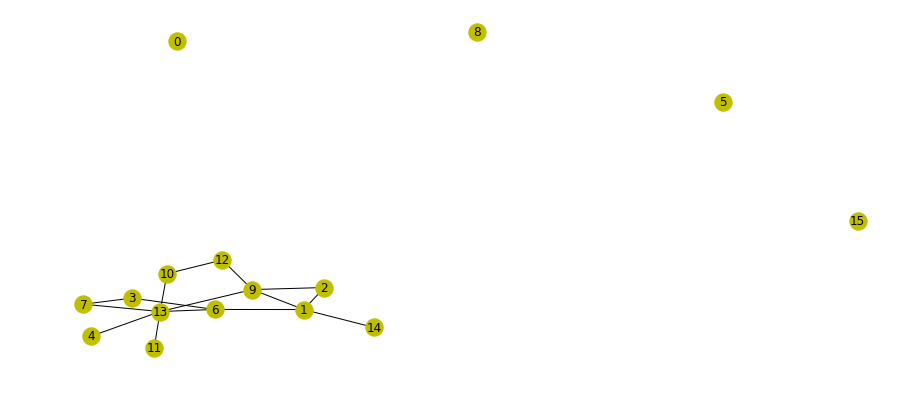

In [2]:
plt.figure(figsize=(12,5))
G = nx.gnm_random_graph(16, 15)
nx.draw(G, **opts)

* Draw $6$ random graphs drawn from model $A$ with $n = 25$ nodes and $m = 30$ edges. 
* For each graph drawn, determine its clustering coefficient $C$ and its transitivity $T$.

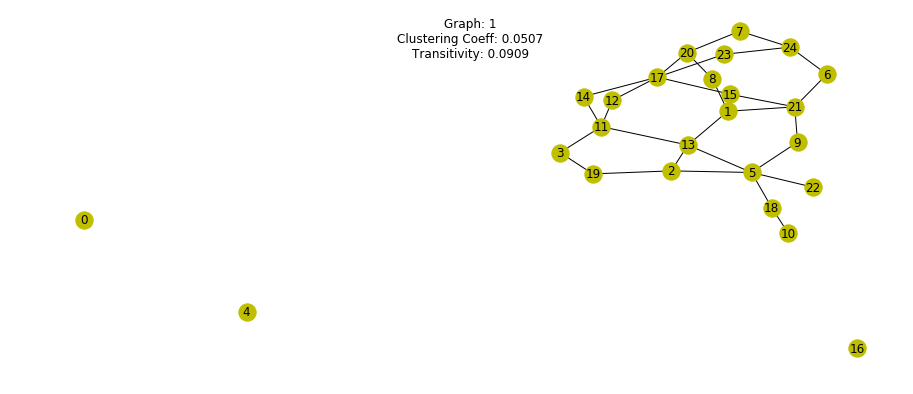

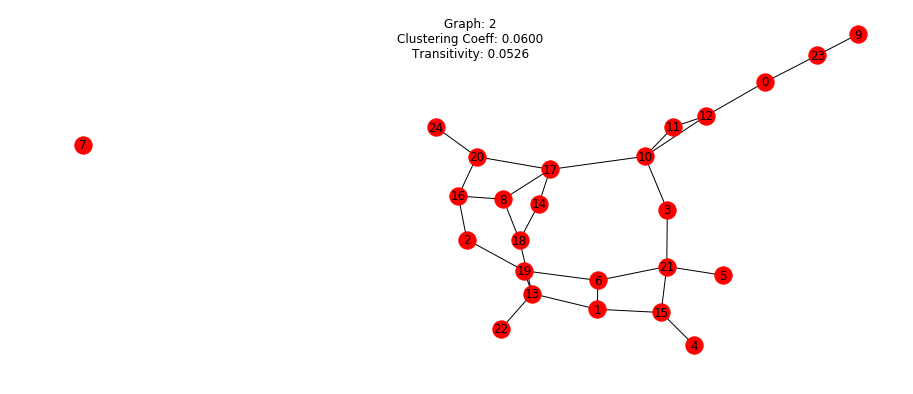

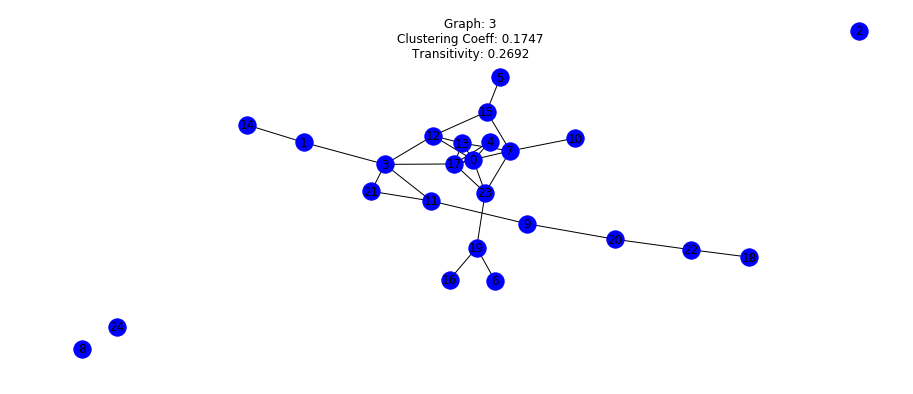

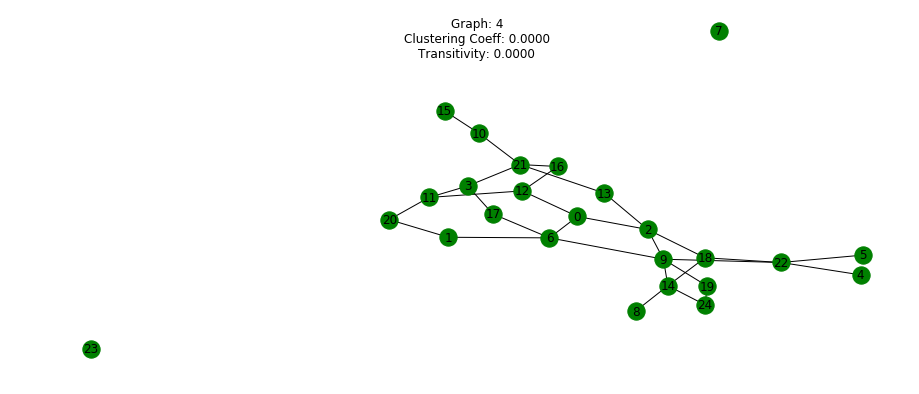

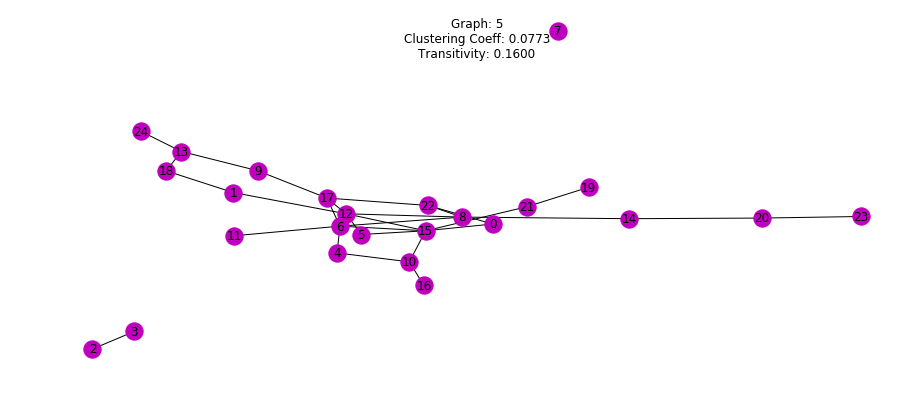

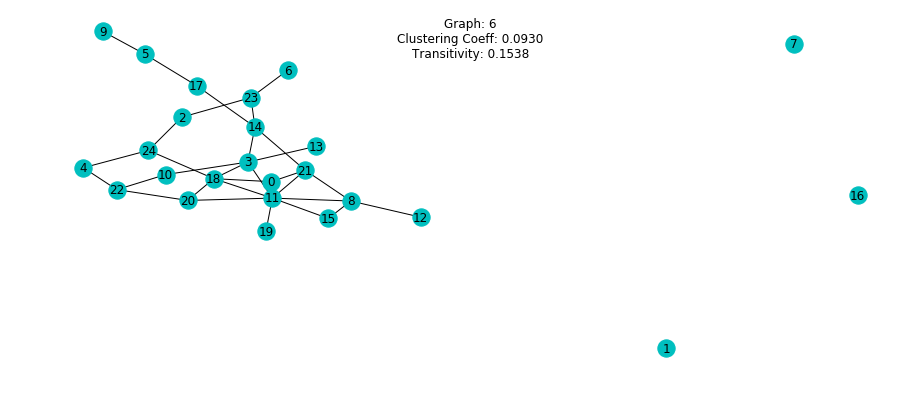

In [3]:
n = 25
m = 30

colors = ['y','r','b','g','m','c']

for i in range(6):
    opts = { "with_labels": True, "node_color": colors[i%len(colors)] }
    plt.figure(figsize=(12,5))
    plt.figure(i+1)
    G = nx.gnm_random_graph(n, m)
    C = nx.average_clustering(G)
    T = nx.transitivity(G)
    nx.draw(G, **opts)
    plt.suptitle("Graph: " + str(i+1) + "\nClustering Coeff: " + str("%.4f" % C) + "\nTransitivity: " + str("%.4f" % T))

## 2.  ER Model $B$

<div class="alert alert-warning">

**Definition (ER Model $B$: Binomial Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq p \leq 1$.


The model $G(n, p)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and each of the $N$
possible edges chosen with probability $p$.
</div>

Model $B$ random graphs in `networkx` can be generated with the function `nx.gnp_random_graph(n, p)`,
where parameter $n$ gives the number of nodes and parameter $p \in [0, 1]$ the edge probability.

#edges:  18


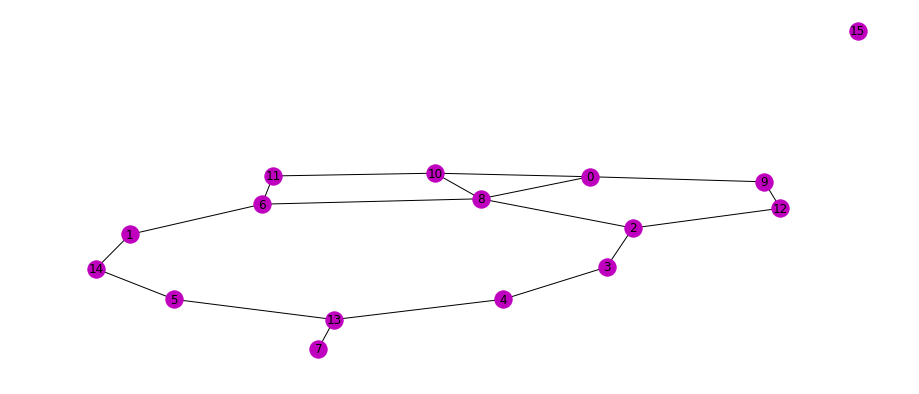

In [4]:
opts2 = { "with_labels": True, "node_color": 'm' }
plt.figure(figsize=(12,5))
G = nx.gnp_random_graph(16, 0.125)
print("#edges: ", G.number_of_edges())
nx.draw(G, **opts2)

* Draw $6$ random graphs drawn from model $B$ with $n = 25$ nodes and edge probability $p = 30/\binom{25}{2}$. 

* For each graph drawn, determine its number of edges,
its clustering coefficient $C$ and its transitivity $T$.

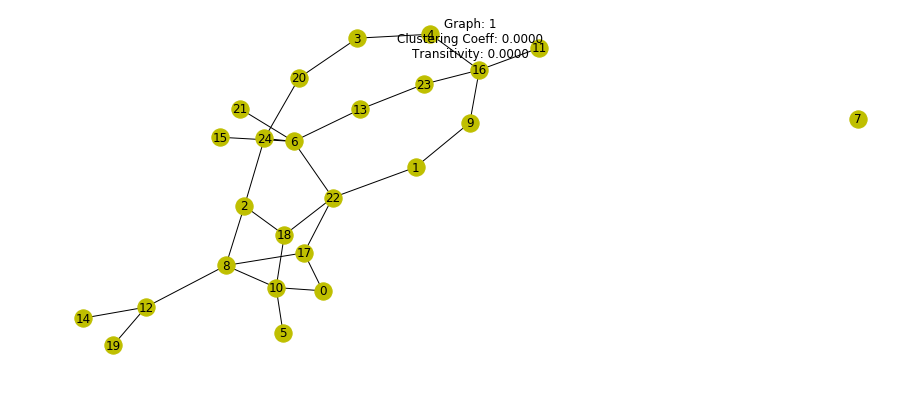

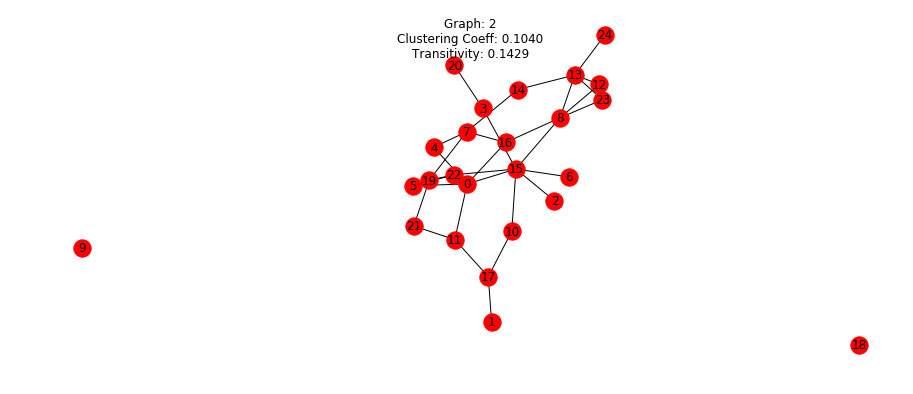

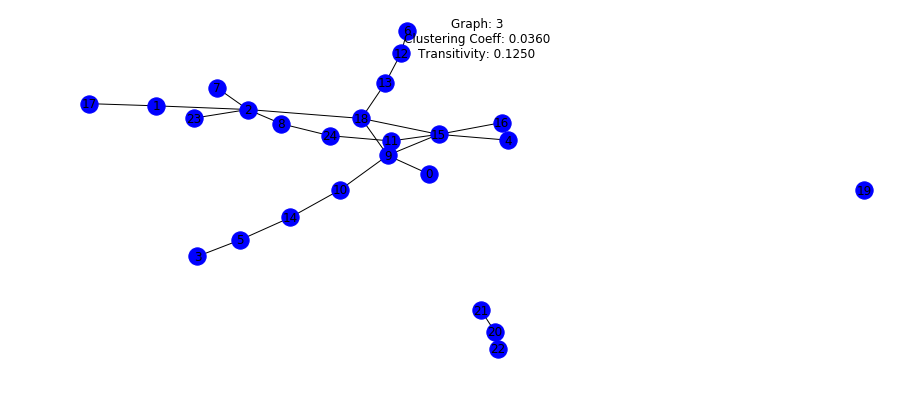

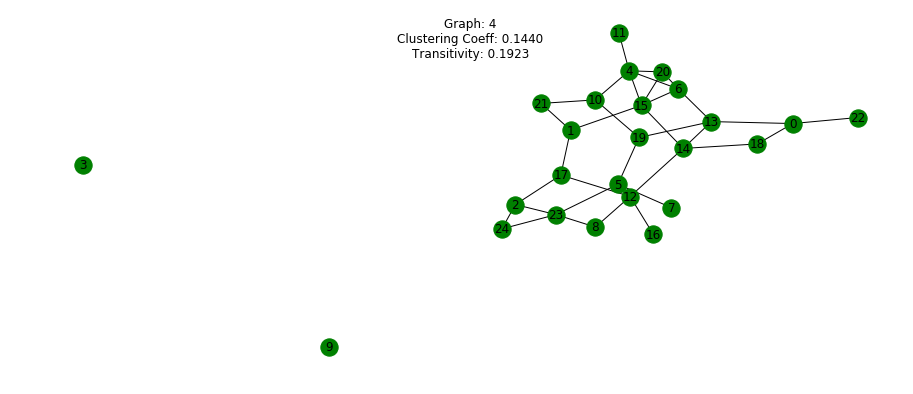

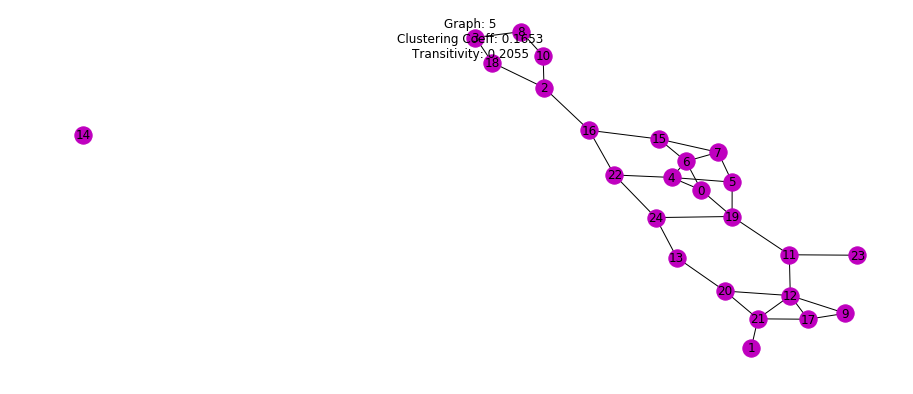

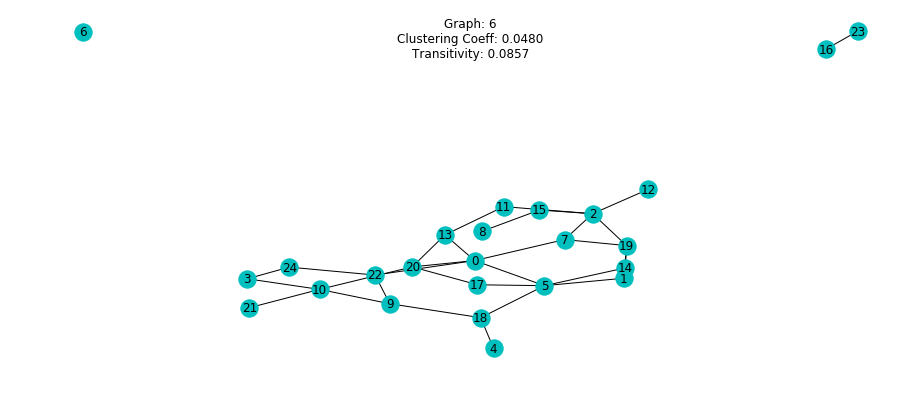

In [5]:
n = 25
p = 30 / (factorial(25) / (factorial(2) * factorial(23)))
colors = ['y','r','b','g','m','c']

for i in range(6):
    opts = { "with_labels": True, "node_color": colors[i%len(colors)] }
    plt.figure(figsize=(12,5))
    plt.figure(i+1)
    G = nx.gnp_random_graph(n, p)
    C = nx.average_clustering(G)
    T = nx.transitivity(G)
    nx.draw(G, **opts)
    plt.suptitle("Graph: " + str(i+1) + "\nClustering Coeff: " + str("%.4f" % C) + "\nTransitivity: " + str("%.4f" % T))

## 3. Degree Distribution

The **degree distribution** of a graph $G = (X, E)$ is the probability distribution of the node degrees of the graph $G$, i.e. the function $p \colon \mathbb{N}_0 \to \mathbb{R}$ defined by
$$
p_k = \frac{n_k}{n},
$$
where $n = |X|$ is the total number of nodes in $G$, and $n_k$ is the number of nodes of degree $k$.
(Note hat $\sum_k p_k = 1$.)

In `networkx`, the numbers $n_k$ can be determined by the function `nx.degree_histogram`.
Then `python` list comprehension can be used to compute the numbers $p_k$ from those.
And those numbers, turned into a `pandas` dataframe, can be plotted nicely and quickly.

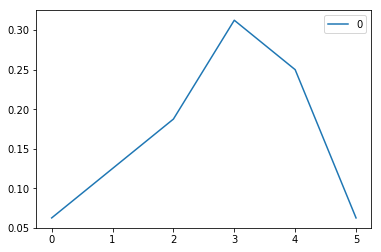

In [6]:
G = nx.gnp_random_graph(16, 0.125)
n = G.number_of_nodes()
histogram = nx.degree_histogram(G) # Nk
distribution = [x/n for x in histogram]
df = pd.DataFrame(distribution)
df.plot()

The degree distribution of a model $B$ random graph is known to follow a **binomial distribution** 
$\mathrm{Bin}(n-1, p)$ of the
form 
$$
p_k = \binom{n-1}{k} p^k (1-p)^{n-1-k}
$$

Using the formula
$$
\binom{n}{k} = \frac{n \cdot (n-1) \dotsm (n-k+1)}{1 \cdot 2 \dotsm k}
$$
in `python`, the binomial coefficient $\binom{n}{k}$ can be computed with the following function:

In [7]:
def binomial(n, k):
    prd, top, bot = 1, n, 1
    for i in range(k):
        prd = (prd * top) // bot
        top, bot = top - 1, bot + 1
    return prd

The binomial distribution $\mathrm{Bin}(n, p)$ can then be defined as: 

In [8]:
def b_dist(n, p, k):
    return binomial(n, k) * p**k * (1-p)**(n-k)

In order to compare the degree distribution of a random graph $G$ on $16$ points
to the corresponding binomial distribution, one can compute and plot the values
of $\mathrm{Bin}(16, p)$ for a suitable value of $p$, and $k$ ranging from $0$
to the highest node degree in $G$, as follows.

In [9]:
len(histogram)

6

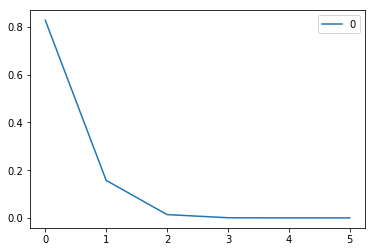

In [10]:
n, p = 16, 0.0125
bb = [b_dist(n-1, p, k) for k in range(len(histogram))]
df = pd.DataFrame(bb)
df.plot()

In the limit $n \to \infty$ (keeping the expected average degree $p (n-1)$ constant), the binomial distribution $\mathrm{Bin}(n-1, p)$ is well approximated by
the **Poisson distribution** defined by
$$
p_k = e^{-\lambda} \frac{\lambda^k}{k!},
$$
where $\lambda = p (n-1)$.

Using the functions `exp` and `factorial` from `python`'s `math` library, one can
compute the Poisson distribution with the follwing `python` function:

In [11]:
from math import exp, factorial
def p_dist(l, k):
    return exp(-l) * l**k / factorial(k)

* Create a model $B$ random graph on $n = 10000$ points, 
with edge probability $p = 0.0015$, and plot its degree distribution.
(This might take some time.  If necessary, reduce the number of points ...)

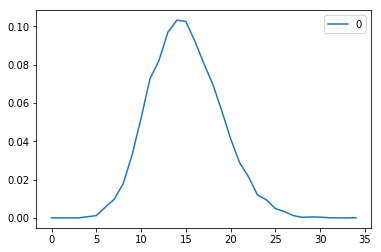

In [12]:
n = 10000
p = 0.0015
G = nx.gnp_random_graph(n, p)
n = G.number_of_nodes()
histogram = nx.degree_histogram(G) # Nk
distribution = [x/n for x in histogram]
df = pd.DataFrame(distribution)
df.plot()

* Compute and plot the binomial distribution that corresponds to a random model $B$ graph
on $n = 10000$ points with $p = 0.0015$ and $k$ ranging from $0$
to the highest node degree in $G$.

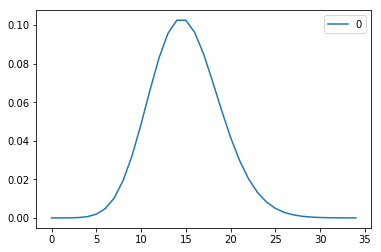

In [13]:
n, p = 10000, 0.0015
highest_node_degree = len(histogram)
bin_dist = [b_dist(n-1, p, k) for k in range(highest_node_degree)]
df = pd.DataFrame(bin_dist)
df.plot()

* Compute and plot the Poisson distribution that corresponds to a random model $B$ graph
on $n = 10000$ points with $p = 0.0015$.

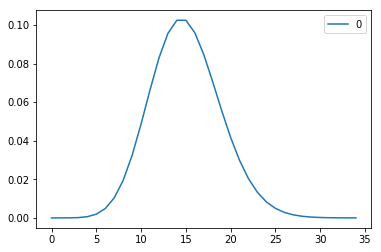

In [14]:
n, p = 10000, 0.0015
highest_node_degree = len(histogram)

# 𝜆=𝑝(𝑛−1) 
l = p*(n-1)

pois_dist = [p_dist(l, k) for k in range(highest_node_degree)]
df = pd.DataFrame(pois_dist)
df.plot()

* What do you conclude from the plots?
Can you plot all the distributions (binomial, Poisson, and the actual degree distribution of a graph $G$)
into a single diagram?

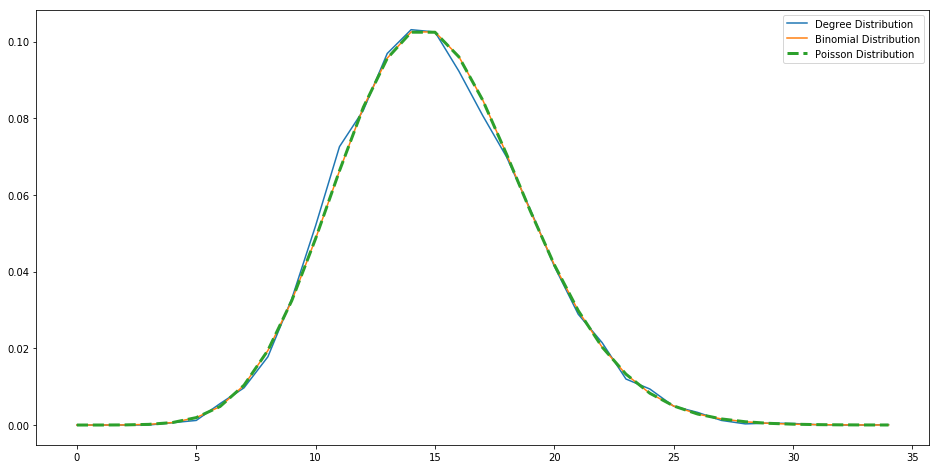

In [15]:
df1 = pd.DataFrame(distribution)
df2 = pd.DataFrame(bin_dist)
df3 = pd.DataFrame(pois_dist)

plt.figure(figsize=(16,8))

plt.plot(df1, label="Degree Distribution")
plt.plot(df2, label="Binomial Distribution")
plt.plot(df3, linewidth=3, linestyle='dashed', label="Poisson Distribution")
plt.legend()

#### As we can see above, the approximation of the Binomial Distrubtion using the Poisson Distrubution is extremely accurate. (Had to adjust the Line Plot Visuals just so they could both be seen)

## 4. Giant Components

Graphs of a certain relative size (number of edges in relation to number of nodes)
have a **giant component**, a connected component that contains a substantial number of
the nodes.
For a random graph $G(n, p)$ in model $B$, the sudden appearance of a giant component
can be described as a function of $p$ (keeping $n$ fixed), by measuring the
size of the largest connected component.

With `networkx`, the connected components of a graph `G` can be found with the command
`nx.connected_components(G)` and their respective sizes are determined with the command

    sz = [len(c) for c in list(nx.connected_components(G))]
    
The `python` function `max` applied to a list of numbers finds the maximum
number in the list, i.e., `max(sz)` is the maxium size in the list `sz`.

* For $n = 10000$, say, compute $50$, say, random $A$-model graphs $G(n, m)$
for varying values of $m$, maybe equally spread out between $0$ and $25000$.
* For each graph, determine the size of its largest connected component.
* Plot these sizes against the values of $m$. 
* Can you spot a pattern? Where does the giant component start to grow?
  Which value of $p$ does that correspond to?

In [16]:
n = 10000
num_graphs = 50
# m is equally spread out between 0 and 25000
m = np.linspace(start=0,stop=25000,num=50)

max_sz_list = {}

for i in range(num_graphs):
    G = nx.gnm_random_graph(n, m[i])
    sz = [len(c) for c in list(nx.connected_components(G))]
    max_sz = max(sz) #max size
    max_sz_list[m[i]] = max_sz #store Edges and Max-Sizes as => Key:Value pairs

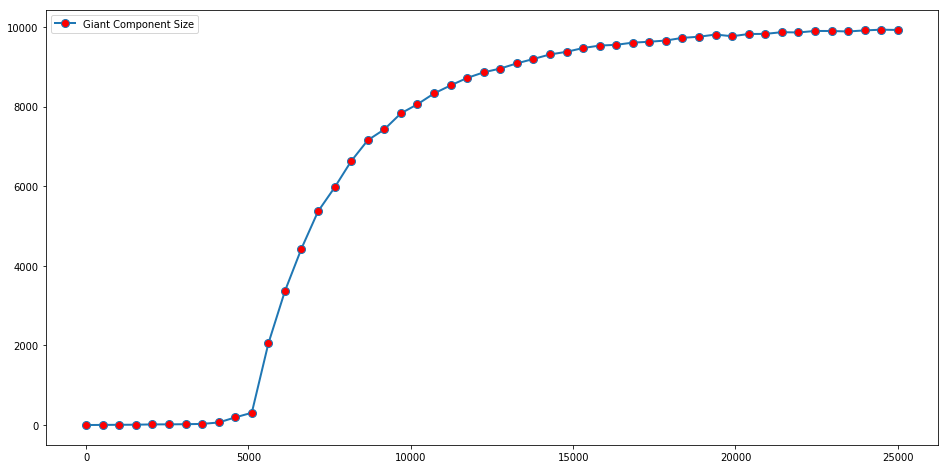

In [17]:
max_sz_df = pd.DataFrame(max_sz_list.values(), index=max_sz_list.keys())
plt.figure(figsize=(16,8))
plt.plot(max_sz_df, label="Giant Component Size", linewidth=2, marker="o", markerfacecolor="r", markersize=8)
plt.legend()

#### A clear pattern can be spotted! 
###### The Giant Component starts to grow slightly after m=5000
Which Value of p does that correspond to?